# Machine Learning for Computer Vision
## Assignment 1 - Group 06



## 1.1.1 The MNIST data set

In [1]:
from packages import *

import data_manager
import perceptron

### Read Data

In [2]:
### Read data
x_train, y_train, x_test, y_test = data_manager.read_mnist_data()

### In case the images should be saved to jpg files
# save_images_to_jpgs('./images/train2', x_train, y_train)
# save_images_to_jpgs('./images/test2', x_test, y_test)

### Reshape images and make them binary

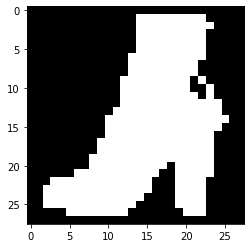

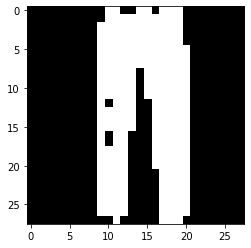

In [3]:
### Extracting subset of classes Ankle boot(9) and Trousers(1)
indices = np.where((y_train == 1) | (y_train == 9))
mnist_subset_rows = x_train[indices]
image_subset = mnist_subset_rows.reshape(mnist_subset_rows.shape[0],28,28)
label_subset = y_train[indices]

### Convert images to binary
thres = 127
image_subset[image_subset < thres] = 0
image_subset[image_subset >= thres] = 1

plt.imshow(image_subset[1],  cmap='gray')
plt.show()
plt.imshow(image_subset[3],  cmap='gray')
plt.show()

### Extract features from the data

In [4]:
### Choose a smaller subset for testing purposes
image_subsubset = image_subset[25:30]
label_subsubset = label_subset[25:30]

features_subset = data_manager.extract_features(image_subsubset, label_subsubset)

### Normalize features
features_subset.area = features_subset.area / max(features_subset.area)
features_subset.cx = features_subset.cx / max(features_subset.cx)
features_subset.cy = features_subset.cy / max(features_subset.cy)
features_subset.convex_area = features_subset.convex_area / max(features_subset.convex_area)
features_subset.eccentricity = features_subset.convex_area / max(features_subset.convex_area)
features_subset.perimeter = features_subset.convex_area / max(features_subset.convex_area)

features_subset

,class,cx,cy,area,convex_area,eccentricity,perimeter,extent
image,,,,,,,,
0,Ankle boot,0.887432,1.000000,0.817337,0.787440,0.787440,0.787440,0.589286
1,Ankle boot,1.000000,0.998525,0.315789,0.562802,0.562802,0.562802,0.301775
2,Trouser,0.773150,0.505571,0.272446,0.541063,0.541063,0.541063,0.325926
3,Ankle boot,0.902823,0.949007,1.000000,1.000000,1.000000,1.000000,0.591575
4,Trouser,0.739907,0.749890,0.705882,0.664251,0.664251,0.664251,0.678571


### Plotting features

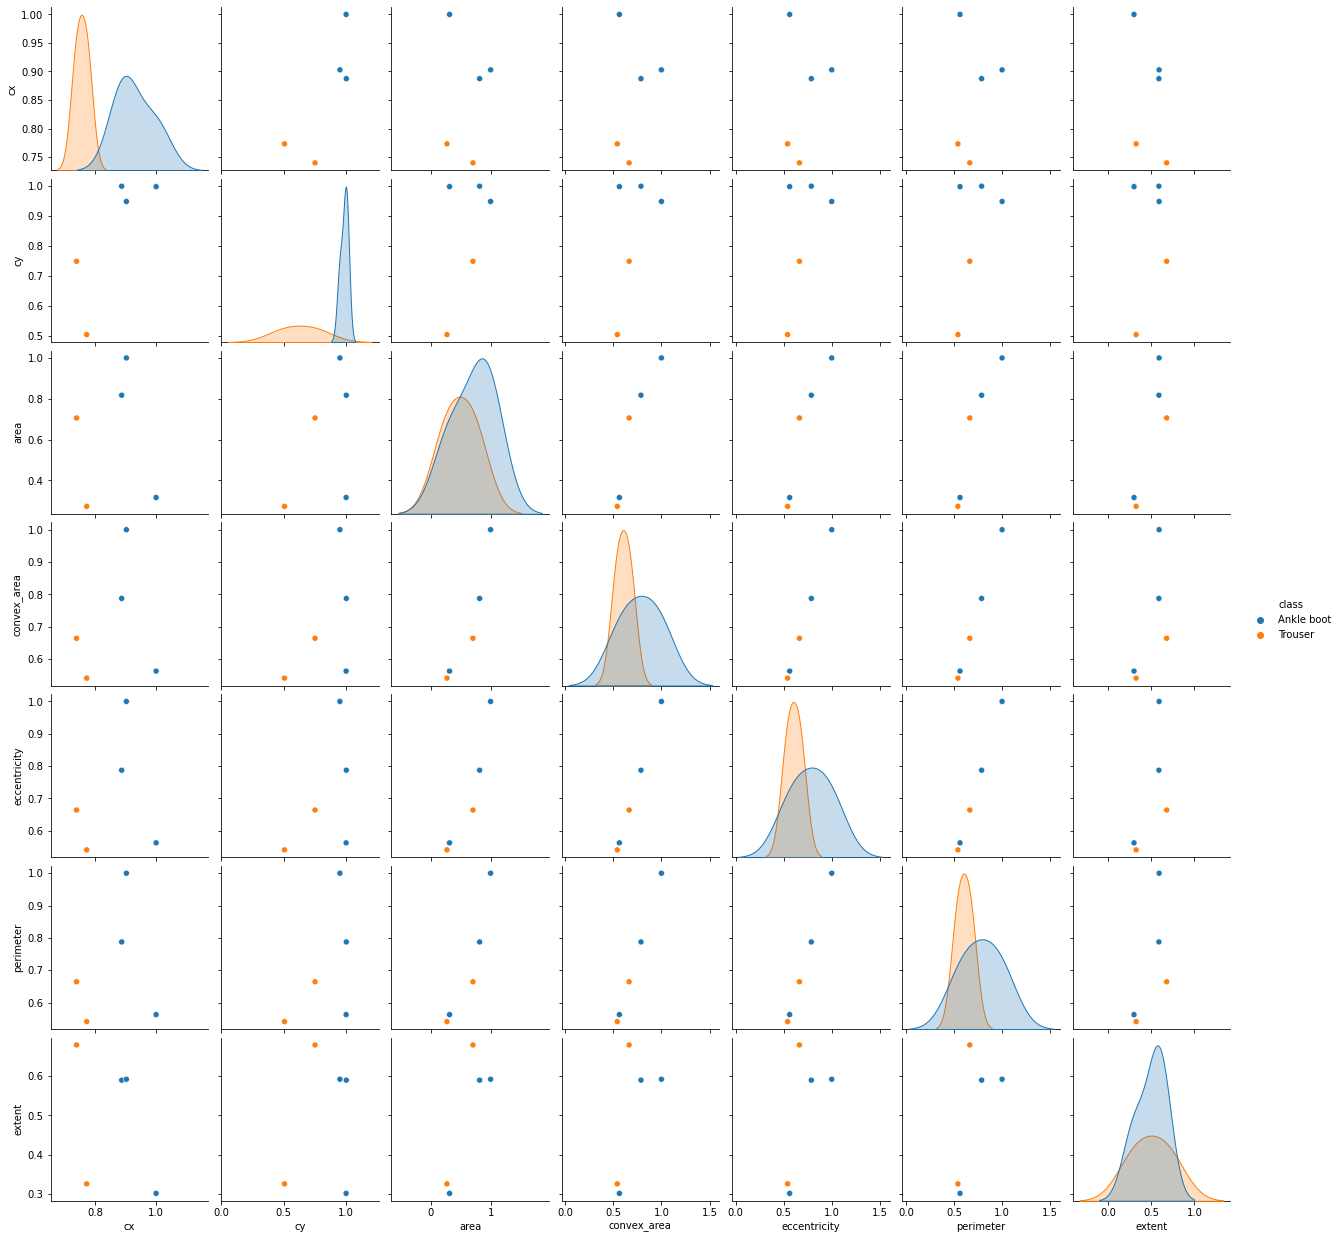

In [5]:
### Comparing different feature combinations
sns.pairplot(features_subset, hue="class");

<AxesSubplot:xlabel='perimeter', ylabel='cx'>

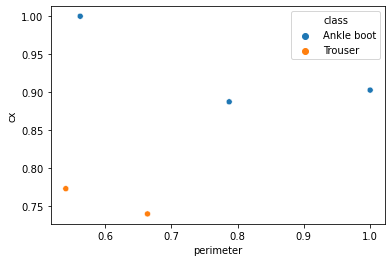

In [6]:
### Best combination with this subset seems to be 'perimeter' and the centroid 'cx'
sns.scatterplot(data=features_subset, x='perimeter', y='cx', hue='class')

## 1.1.2 Perceptron training algorithm

In [7]:
X = np.vstack((features_subset.perimeter, features_subset.cx)).T

## Convert Ankle boot label from 9 to -1 for training
t = label_subsubset.astype(int)
t[t==int(9)] = -1

maxIts = 100
online = False

w = perceptron.percTrain(X, t, maxIts, online)
prediction = perceptron.perc(w, X)

18 epochs needed. w = [ 3.         -3.08695652 -1.26341819]
Prediction: [-1. -1.  1. -1.  1.]
